<a href="https://colab.research.google.com/github/Pranavigadikoppula/PRANAVI_DATA690/blob/main/Assignment_05/Assignment_05_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

using jupiter notebook


2-part

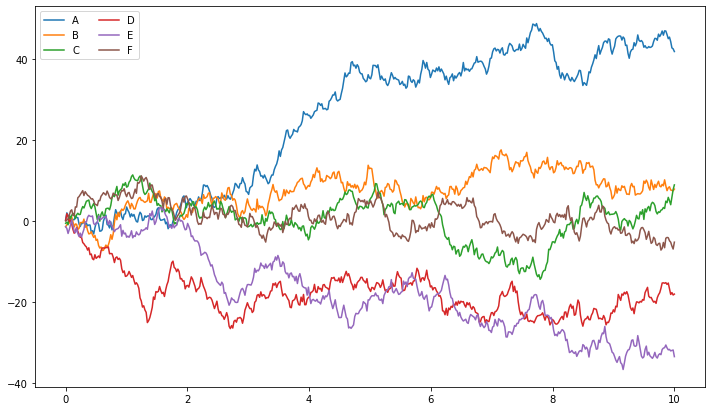

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [3]:
import requests
import pandas as pd


def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [4]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
count,169.000000,169.000000,169.000000,169.000000,169.000000,1.690000e+02
mean,41305.882544,41546.167337,41058.578166,41313.835976,90.722214,3.779869e+06
std,2273.941700,2296.432500,2255.164527,2269.190406,93.260236,3.936614e+06
min,37408.050000,37824.480000,37015.740000,37410.010000,4.262395,1.682428e+05
25%,39100.840000,39216.500000,38943.610000,39122.010000,28.543431,1.182265e+06
50%,41441.610000,41558.950000,41251.380000,41439.510000,53.465534,2.250032e+06
75%,43536.140000,43859.520000,43333.000000,43564.730000,112.331332,4.576964e+06
max,44858.140000,45332.380000,44454.990000,44822.340000,527.540571,2.270716e+07


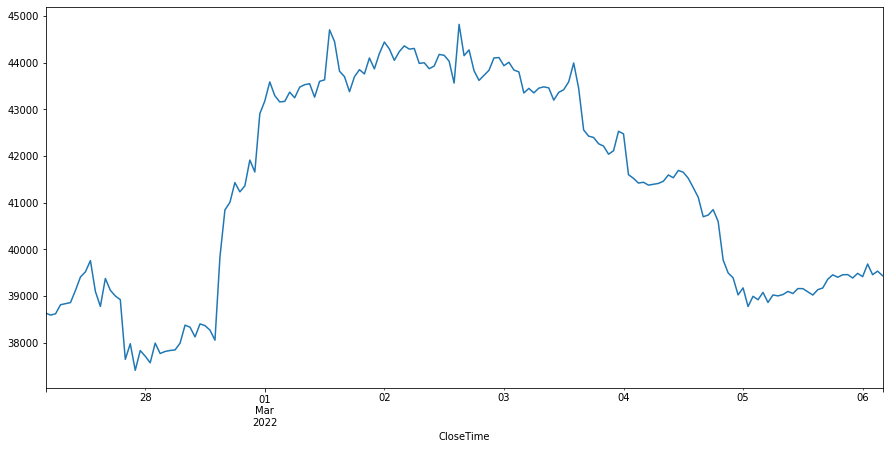

In [5]:
btc['ClosePrice'].plot(figsize=(15, 7))

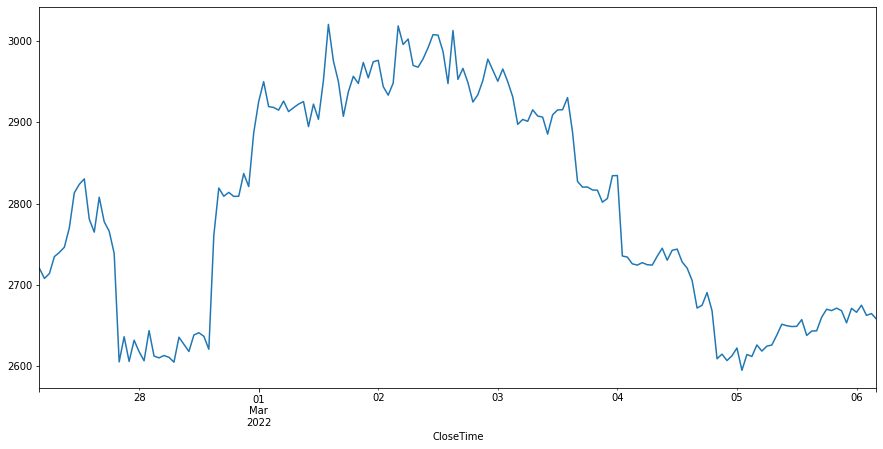

In [6]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [7]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [8]:
writer = pd.ExcelWriter('cryptos.xlsx')


btc.to_excel(writer, sheet_name='Bitcoin')
eth.to_excel(writer, sheet_name='Ether')


writer.save()
